# Исследование объявлений о продаже квартир

Oпределять рыночную стоимость объектов недвижимости. Yстановить параметры. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод
В данных очень много пропусков. Всего существует 449 записей без каких-либо пропусков. 14 граф из 22 содержат пропуски (от 0,2% до 88%)
 Критичными считаю пропуски в графе 'жилая площадь' ('living_area'). Поскольку эти данные важны для текущего исследования - нет точного способа заполнения пропусков, так как жилая площадь может сильно отличаться от общей и существенно влиять на стоимость жилья.  
  Так же вызывает вопросы заполнение графы 'апартаменты' ('is_apartment') - большая часть данных состоит из пропусков.
  Данные об окружающих объектах и ближайщих объектах так же содержат пропуски, но они не критичны для данного исследования. 
  
  

### Шаг 2. Предобработка данных

In [4]:
data.loc[data['floors_total'].isna() == True, 'floors_total'] = data.loc[data['floors_total'].isna() == True, 'floor']
data['floors_total'] = data['floors_total'].astype('int')

In [5]:
ceiling_height = data.query('ceiling_height.isna() == False').pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = 'median')
data = data.join(ceiling_height, on = 'floors_total', rsuffix = '_standart')
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] = data.loc[data['ceiling_height'].isna() == True, 'ceiling_height_standart']
ceiling_height_median = data['ceiling_height'].median()
data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'] = data.loc[data['ceiling_height'].isna() == True, 'ceiling_height'].fillna(ceiling_height_median)

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')

In [7]:
data['balcony'] = data['balcony'].fillna(0)

In [8]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [9]:
cityCenters_nearest = data.query('cityCenters_nearest.isna() == False').pivot_table(index ='locality_name', values = 'cityCenters_nearest', aggfunc = 'mean')
data = data.join(cityCenters_nearest, on ='locality_name', rsuffix = '_mean')
data.loc[data['cityCenters_nearest'].isna() == True, 'cityCenters_nearest'] = data.loc[data['cityCenters_nearest'].isna() == True, 'cityCenters_nearest_mean']

In [10]:
airports_nearest = data.query('airports_nearest.isna() == False').pivot_table(index ='locality_name', values = 'airports_nearest', aggfunc = 'mean')
data = data.join(airports_nearest, on ='locality_name', rsuffix = '_mean')
data.loc[data['airports_nearest'].isna() == True, 'airports_nearest'] = data.loc[data['airports_nearest'].isna() == True, 'airports_nearest_mean']

In [11]:
print(data.query('(airports_nearest.isna()== True) and (cityCenters_nearest.isna() == True)')['locality_name'].value_counts().head(10))
data.loc[data['cityCenters_nearest'].isna() == True, 'cityCenters_nearest'] = data.loc[data['cityCenters_nearest'].isna() == True, 'cityCenters_nearest'].fillna(0)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64


In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [13]:
data['%total-living'] = data['living_area']/data['total_area']
living_area_k = data['%total-living'].median()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_k)

In [14]:
print(data.query('living_area > total_area'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_standart, cityCenters_nearest_mean, airports_nearest_mean, %total-living]
Index: []

[0 rows x 26 columns]


In [15]:
data['%total-kitchen'] = (data['total_area'] - data['living_area'])/data['total_area']
kitchen_k = data['%total-kitchen'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_k)

In [16]:
print('В данных найдено дубликатов:', data.duplicated().sum())

В данных найдено дубликатов: 0


In [17]:
data_without_days = data.loc[data['days_exposition'].isna() == True]
display(data_without_days)
data.dropna(subset = ['days_exposition'], inplace = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_standart,cityCenters_nearest_mean,airports_nearest_mean,%total-living,%total-kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,2.70,11601.291571,28046.186237,0.472222,0.527778
7,5,7915000.0,71.60,2019-04-18,2,2.75,24,40.658769,22,False,...,0.0,0.0,0.0,0.0,NaN,2.75,11601.291571,28046.186237,NaN,0.432140
44,13,5350000.0,40.00,2018-11-18,1,2.75,22,22.714396,3,False,...,1.0,620.0,1.0,1152.0,NaN,2.75,11601.291571,28046.186237,NaN,0.432140
45,17,5200000.0,50.60,2018-12-02,2,2.65,9,30.300000,7,False,...,0.0,0.0,0.0,0.0,NaN,2.55,11601.291571,28046.186237,0.598814,0.401186
46,17,6600000.0,52.10,2019-01-31,2,2.60,24,29.700000,9,False,...,0.0,0.0,0.0,0.0,NaN,2.75,11601.291571,28046.186237,0.570058,0.429942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.400000,17,False,...,0.0,0.0,0.0,0.0,NaN,2.66,11601.291571,28046.186237,0.492414,0.507586
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.300000,5,False,...,0.0,0.0,0.0,0.0,NaN,2.55,50739.969697,48308.280303,0.558065,0.441935
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,1.0,796.0,3.0,381.0,NaN,2.55,11601.291571,28046.186237,0.547792,0.452208
23696,18,2500000.0,56.70,2018-02-11,2,2.80,3,29.700000,1,False,...,0.0,0.0,0.0,0.0,NaN,2.80,NaN,NaN,0.523810,0.476190


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 27 columns):
total_images                20518 non-null int64
last_price                  20518 non-null float64
total_area                  20518 non-null float64
first_day_exposition        20518 non-null datetime64[ns]
rooms                       20518 non-null int64
ceiling_height              20518 non-null float64
floors_total                20518 non-null int64
living_area                 20518 non-null float64
floor                       20518 non-null int64
is_apartment                20518 non-null bool
studio                      20518 non-null bool
open_plan                   20518 non-null bool
kitchen_area                20518 non-null float64
balcony                     20518 non-null float64
locality_name               20470 non-null object
airports_nearest            15950 non-null float64
cityCenters_nearest         20518 non-null float64
parks_around3000            20518 n

### Вывод
Заменены пропущенные значения:
-  для графы 'апартаменты'('is_appartment') на значение 'не являются апартаментами' ('False'). Тип значений для этой графы изменен на булевый ('bool'). Аппартаменты - не самая распространенная недвижимость. И для данной работы аппартаменты не являются целью исследования.
- для графы 'floors_total' пропущенные значения заменены на значения 'floor' для этих же строк.
-  для графы 'высота потолка' ('ceiling_height') на медианное значение высоты потолков для зданий той же этажности ('floors_total') - поскольку здания строятся по типовым проектам и здания с одинаковым количеством этажей имеют одинаковую высоту потолков.
- в графе 'balcony' пропущенные значения заменены на 0. Если балконы не указаны - значит их нет.
-  для графы cityCenter_nearest - 5519 пропущенных значений, а для графы airports_nearest - 5542 значения. Это важные показатели - можно жить недалеко от центра города, пользоваться всеми привилегиями города и страдать от рева реактивных двигателей и периодических хлопков перехода самолета на сверхзвуковую скорость. Небольшую часть значений удалось восстановить с помощью медианного значения этих показателей для некоторых городов ('locality_name'). Но большая часть пропущенных значений графы cityCenter_nearest была заменена на 0. (поскольку в изначальном датасете нет ни одного 0 с графе 'cityCenter_nearest' это не внесет путаницу в данные). В Санкт-Петербурге (более половины датасета составляют именно объявления по продаже недвижимости в самом СПб) не существует пропущенных значений и нулевых значений. Для мелких городов и деревень будем считать, что расстояние до ближайшего центра незначительно. 


 Для того, чтобы избежать пропусков в графах cityCenter_nearest и airports_nearest можно использовать не ввод адреса в ручную, а указание конкретного дома на карте. Тогда система сможет автоматически посчитать необходимые расстояний. Эти данные были взяты автоматически - либо не корректно работает система выгрузки данных, либо ресурс, с которго данные были получены слишком не полный / подходит только для СПб и ближайщих населенных пунктов, но не распространяется на города Ленинградской области. 
 Уточню, что в состав города Санкт-Петербург входит 18 районов, 9 городов (Зеленогорск, Колпино, Красное Село, Кронштадт, Ломоносов, Павловск, Петергоф, Пушкин, Сестрорецк) и 21 посёлок. При этом СПб и Ленинградская область - два отдельных образования, так же как и Москва и МО. 
 
 
- для граф 'living_area' и 'kitchen_area' были введены коэффициенты для восстановления этих площадей при известной общей площади ('total_area'). Данный способ не является абсолютно точным, но гистограмма для подобранных коэффициентов показывает, что распределение значений '%total-kitchen' (отношение площади кухни к общей площади) и '%total-living' (отношение жилой к общей площади) в выборке похоже на нормальное. Значит, использование медианных значений для данных значений не нарушит реальности данных. 
- для графы 'days_exposition' пропущенные значения были оставлены как пропущенные, но выделены в отдельную таблицу. (Не вижу достоверного способа заполнения этих значений, без данных о длительности объявления не ясно, была ли вообще совершена сделка, или ушла в архив,а квартира так и осталась не продана, потому что цена была слишком завышена) 

Так же изменены типы данных для граф:
- 'first_day_exposition' поскольку это дата на тип datetime64
- 'is_apartment' на тип 'bool'
- 'floors_total' на тип int, считаем, что количество этажей в основном целое число


### Шаг 3. Посчитайте и добавьте в таблицу

In [19]:
data['square_m_cost'] = data['last_price'] / data['living_area']
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

data['kitchen_%'] = data['kitchen_area'] / data['total_area']
data['living_%'] = data['living_area'] / data['total_area']
             
data['floor_position'] = '0'
data.loc[data['floor'] == 1,'floor_position'] = data.loc[data['floor'] == 1,'floor_position'].replace('0', 'первый')
data.loc[(data['floor'] != 1) & (data['floors_total']/data['floor'] == 1),'floor_position'] = data.loc[(data['floor'] != 1) & (data['floors_total']/data['floor'] == 1),'floor_position'].replace('0', 'последний')
data.loc[data['floor_position'] == '0','floor_position'] = data.loc[data['floor_position'] == '0','floor_position'].replace('0', 'другой')
print(data['floor_position'].value_counts())
data.info()

другой       15156
последний     2892
первый        2470
Name: floor_position, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20518 entries, 1 to 23697
Data columns (total 34 columns):
total_images                20518 non-null int64
last_price                  20518 non-null float64
total_area                  20518 non-null float64
first_day_exposition        20518 non-null datetime64[ns]
rooms                       20518 non-null int64
ceiling_height              20518 non-null float64
floors_total                20518 non-null int64
living_area                 20518 non-null float64
floor                       20518 non-null int64
is_apartment                20518 non-null bool
studio                      20518 non-null bool
open_plan                   20518 non-null bool
kitchen_area                20518 non-null float64
balcony                     20518 non-null float64
locality_name               20470 non-null object
airports_nearest            15950 non-null fl

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [20]:
data_for_hist = ['living_area', 'total_area', 'last_price', 'square_m_cost', 'rooms', 'ceiling_height']

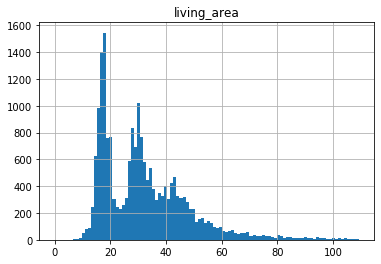

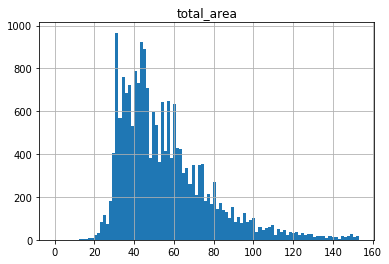

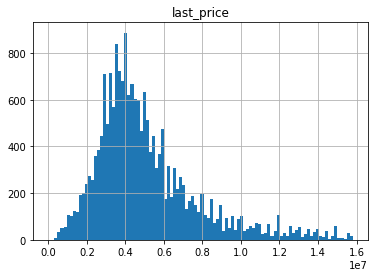

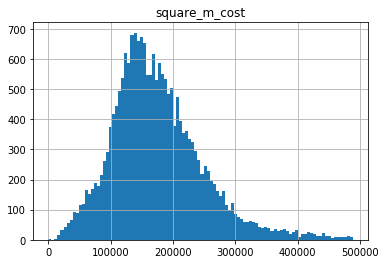

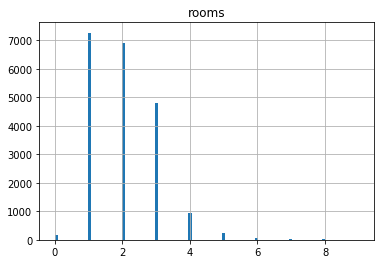

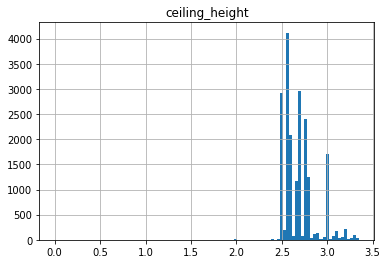

In [21]:
for column in data_for_hist:
    q1 = data[column].quantile(q = 0.25)
    q3 = data[column].quantile(q = 0.75)
    iqr = (q3 - q1)
    data.hist(column, bins = 100, range=(0, (q3+3*iqr)))
    

In [22]:
group_by_rooms_k = data.groupby('rooms')['living_%'].median()
data.query('studio == True')['total_area'].min()
minimal_living_flat = 28 * group_by_rooms_k[1]

living_area
Выбросами считаются значения
- больше, чем 75.35


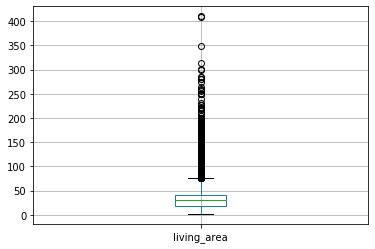

total_area
Выбросами считаются значения
- больше, чем 110.50000000000001


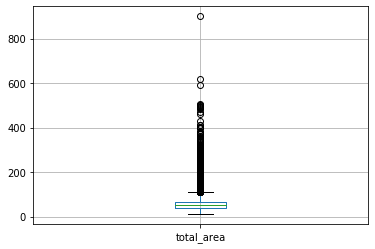

last_price
Выбросами считаются значения
- больше, чем 11150000.0


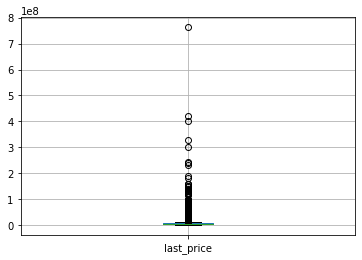

square_m_cost
Выбросами считаются значения
- больше, чем 352957.5863956418


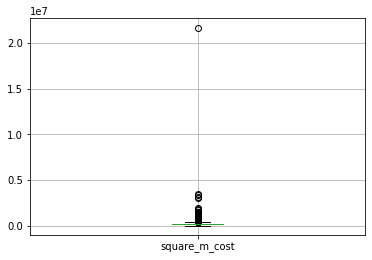

rooms
Выбросами считаются значения
- больше, чем 6.0


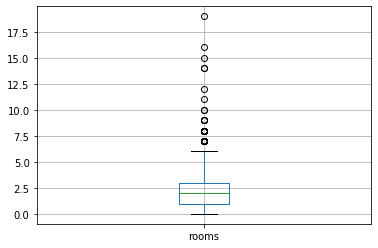

ceiling_height
Выбросами считаются значения
- больше, чем 3.0500000000000003


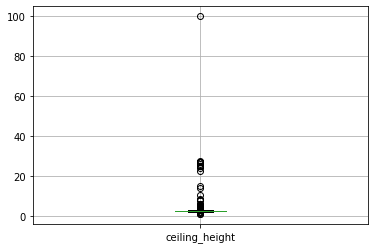

In [23]:
for column in data_for_hist:
    print(column)
    q1 = data[column].quantile(q = 0.25)
    q3 = data[column].quantile(q = 0.75)
    iqr = (q3 - q1)
    print('Выбросами считаются значения')
    print('- больше, чем', (q3 + 1.5 * iqr))
    data.boxplot(column)
    plt.show()

In [24]:
data_without_strange = data.loc[(data['living_area'] >= 13.759) & (data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 3.05)]
data_without_strange  = data_without_strange.loc[(data_without_strange['square_m_cost'] < 352957.586) & (data_without_strange['rooms'] < 7)]
data_without_strange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18423 entries, 1 to 23697
Data columns (total 34 columns):
total_images                18423 non-null int64
last_price                  18423 non-null float64
total_area                  18423 non-null float64
first_day_exposition        18423 non-null datetime64[ns]
rooms                       18423 non-null int64
ceiling_height              18423 non-null float64
floors_total                18423 non-null int64
living_area                 18423 non-null float64
floor                       18423 non-null int64
is_apartment                18423 non-null bool
studio                      18423 non-null bool
open_plan                   18423 non-null bool
kitchen_area                18423 non-null float64
balcony                     18423 non-null float64
locality_name               18381 non-null object
airports_nearest            14002 non-null float64
cityCenters_nearest         18423 non-null float64
parks_around3000            18423 n

### Вывод
В датасете есть странные значения для жилой площади - менее 10 м кв. При нормативе жилой площади 11м кв на человека. Возможно при составлении датасета были сохранены данные с другими единицами измерения.
Так же есть слишком маленькие значения общей площади - менее 17,6м. 
Распределение общей стоимости и стоимости за кв м похожи на нормальные.
Два пика в распределении жилой площади подходят как раз для двух самых часто продаваемых квартир - однокомнатных и двухкомнатных. 
Высота потолков колеблется в небольших пределах. За исключением странных выбросов:
- 304 значения с высотой потолка более 3,5м. 
- 14 значений с очень низкими потолками (менее 2,2 м). 
Это либо ошибки в единицах измерения, либо ошибка при внесении данных.


Минимальная граница для значение 'total_area' и 'ceiling_heignt' взяты из СП 54.13330.2011.
Минимальные значения для 'living_area' посчитаны с помощью медианного отношения жилой к общей площади - параметр 'living%' для однокомнатной квартиры. При таком расчета учитывается и наличие в списке квартир-студий, чья общая площадь ('total_area') меньше положенной по СП (28м - минимальная общая площадь для 1-комнатной квартиры в многоквартирном доме).
Максимальные допустимые значения параметров, определены с помощью графика boxplot, посчитаны путем прибаления 1,5 межквартильного размаха к 3 квартилю (75%) параметров. 

count    18423.000000
mean       174.426532
std        213.578858
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64


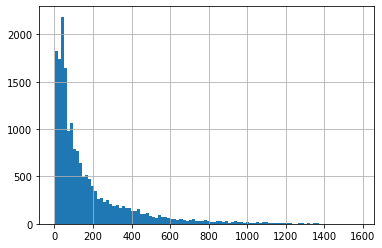

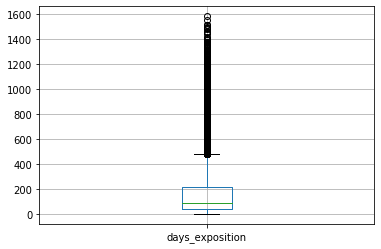

                 rooms
days_exposition       
45.0               847
60.0               503
7.0                218
30.0               188
4.0                157
90.0               157
3.0                146
5.0                137
20.0               134
14.0               130
306


In [25]:
print(data_without_strange['days_exposition'].describe())
data_without_strange['days_exposition'].hist(bins = 100)
plt.show()
data_without_strange.boxplot(column = 'days_exposition')
plt.show()
print(data_without_strange.pivot_table(index ='days_exposition', values = 'rooms', aggfunc = 'count').sort_values(by = 'rooms', ascending = False).head(10))
print(data_without_strange.query('days_exposition <= 4')['rooms'].count())

### Выводы
Количество дней, за которые продаются квартиры очень разное.
Есть явные выбросы в 45 и 60 дней - это похоже на стандартные величины - сделки, с закрепленным сроком завершения. 
Очень редки значения 'days_exposition' больше 1000. 
Слишком быстрыми могут являтся продажи быстрее, чем за 3 дня. Но таких продаж мало - всего 4. Есть вероятность, что они действительно были сделаны за такой короткий срок.

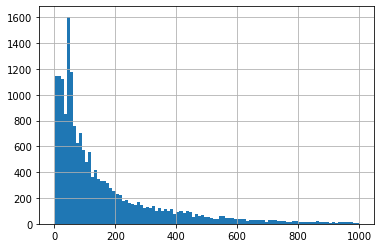

In [26]:
data_without_strange = data_without_strange.query('3 <= days_exposition < 1000')
data_without_strange['days_exposition'].hist(bins = 100, range=(1, 1000))

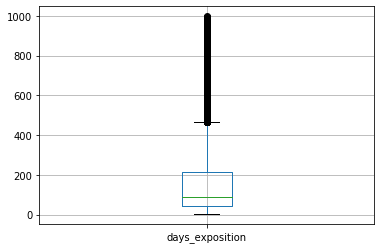

In [27]:
data_without_strange.boxplot(column ='days_exposition')

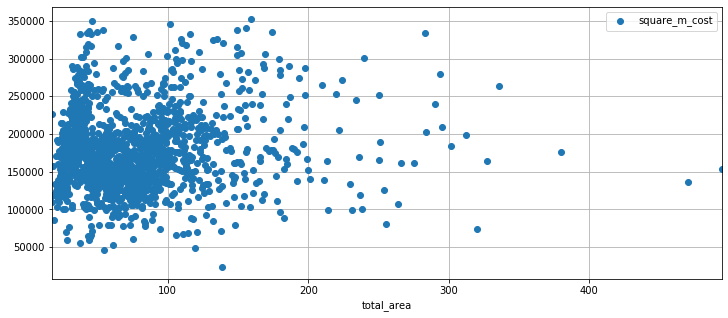

-0.020027747530156556


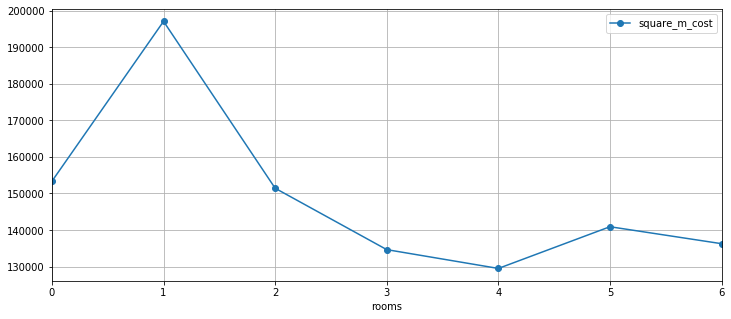

-0.31822735032343985


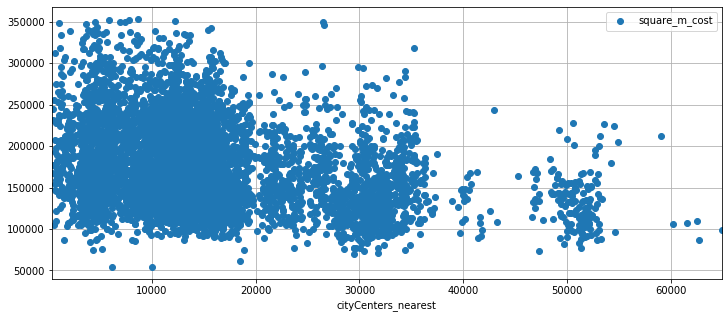

0.15821460564653567


In [28]:
data_without_strange.pivot_table(index ='total_area', values = 'square_m_cost', aggfunc = 'median').plot(style = 'o', grid=True, figsize=(12, 5))
plt.show()
print(data_without_strange['square_m_cost'].corr(data_without_strange['total_area']))
data_without_strange.pivot_table(index ='rooms', values = 'square_m_cost', aggfunc = 'median').plot(style = 'o-', grid=True, figsize=(12, 5))
plt.show()
print(data_without_strange['square_m_cost'].corr(data_without_strange['rooms']))
data_without_strange.query('cityCenters_nearest != 0').pivot_table(index ='cityCenters_nearest', values = 'square_m_cost', aggfunc = 'median').plot(style = 'o', grid=True, figsize=(12, 5))
plt.show()
print(data_without_strange['square_m_cost'].corr(data_without_strange['cityCenters_nearest']))

In [29]:
data_without_strange.groupby('floor_position')['square_m_cost'].median()

floor_position
другой       171313.934378
первый       130363.036304
последний    142857.142857
Name: square_m_cost, dtype: float64

                    square_m_cost      
                           median count
weekday_exposition                     
0                   162708.165458  2678
1                   161237.785016  3195
2                   162765.957447  3029
3                   161111.111111  3283
4                   161889.037503  3170
5                   161118.558860  1502
6                   160969.651949  1338


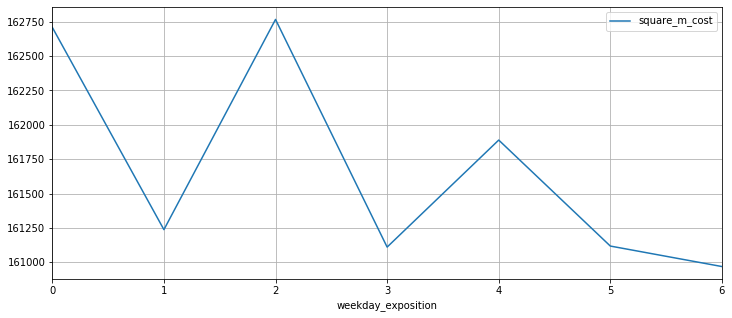

                  square_m_cost      
                         median count
month_exposition                     
1                 164615.006254  1149
2                 160427.807487  2027
3                 159691.629956  1733
4                 158756.680531  1366
5                 157979.626486  1016
6                 156250.000000  1497
7                 161614.099554  1398
8                 166715.686275  1444
9                 166666.666667  1615
10                164086.464724  1734
11                163525.315301  1938
12                156732.036915  1278


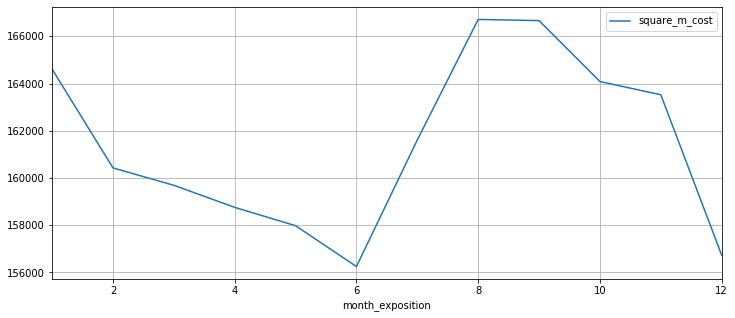

                 square_m_cost      
                        median count
year_exposition                     
2014             163226.339081    54
2015             155880.570410   808
2016             155634.920635  2382
2017             158823.529412  7105
2018             165048.543689  6875
2019             178896.103896   971


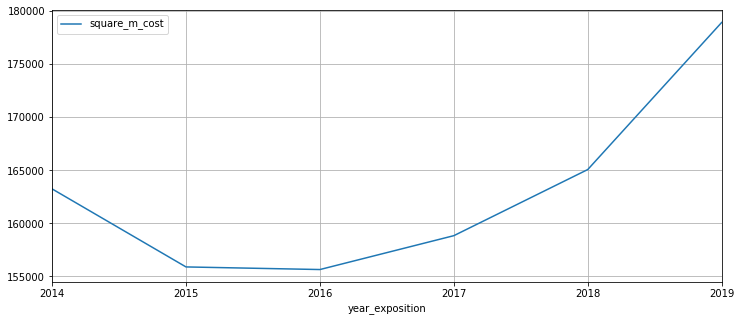

In [30]:
print(data_without_strange.groupby('weekday_exposition').agg({'square_m_cost' : ['median', 'count']}))
data_without_strange.pivot_table(index ='weekday_exposition', values = 'square_m_cost', aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.show()
print(data_without_strange.groupby('month_exposition').agg({'square_m_cost' : ['median', 'count']}))
data_without_strange.pivot_table(index ='month_exposition', values = 'square_m_cost', aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.show()
print(data_without_strange.groupby('year_exposition').agg({'square_m_cost' : ['median', 'count']}))
data_without_strange.pivot_table(index ='year_exposition', values = 'square_m_cost', aggfunc = 'median').plot(grid=True, figsize=(12, 5))
plt.show()


### Вывод
Стоимость кадратного метра понижается во вторник, четверг и выходные (суббота и воскресенье). А наибольшая цена - в понедельник и среду. При этом в выходные количество объявлений снижается вдвое. 
Стоимость кадратного метра наименьшая в июне. А наибольшая цена - в августе и сентябре. При этом есть видимо новогодний скачок стоимости между декабрем и январем - резкое повышение цены. 
Стоимость кадратного метра выросла за последние 5 лет примерно на 13% 


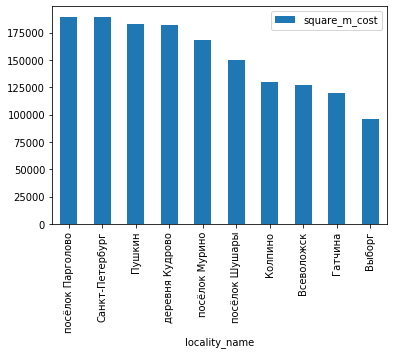

                   rooms  square_m_cost
locality_name                          
Санкт-Петербург    11644  189417.097089
посёлок Мурино       488  168335.971247
посёлок Шушары       391  149960.024374
Всеволожск           325  127349.992366
Колпино              294  129923.000710
деревня Кудрово      288  182386.719943
Пушкин               280  183278.775157
посёлок Парголово    280  189548.922638
Гатчина              263  119429.068924
Выборг               194   95680.766613


In [31]:
data_local = data_without_strange.groupby('locality_name').agg({'rooms' : 'count', 'square_m_cost' : 'mean'}).sort_values(by = 'rooms', ascending = False)
data_local.head(10).sort_values(by = 'square_m_cost', ascending = False).plot(kind = 'bar', y = 'square_m_cost')
plt.show()
print(data_local.head(10))

##### Вывод

Наиболее дорогое жилье находится в г. Санкт-Петербург и поселке Парголово (такие высокие цены на жилье в поселке видимо связаны с активным ростом населения в данном поселке за последние 5 лет, а так же постройке нового современного ЖК "Парголово"). 
В Санкт-Петербурге  больше всего объявлений о продаже - 11 644 объявлений/ более половины всего датасета. 
На последнем месте в 10ке самых дорогих мест для покупки жилья в данном датасете -  Выборг. Жилая площадь в Выборге стоит примерно в 2 раза меньше, чем в Санкт-Петербурге.  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


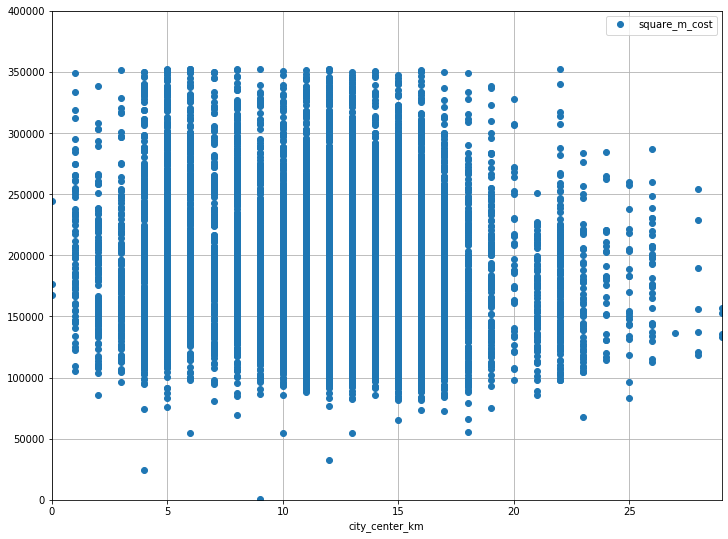

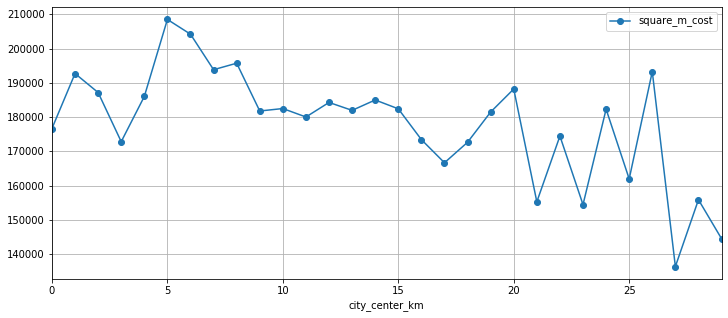

                square_m_cost
city_center_km               
0.0             176666.666667
1.0             192719.486081
2.0             187173.202614
3.0             172826.940850
4.0             186023.622047
5.0             208514.492754
6.0             204210.784314
7.0             193841.237724
8.0             195737.327189
9.0             181780.412008
10.0            182500.000000
11.0            180031.645570
12.0            184280.467618
13.0            181968.390805
14.0            185000.000000
15.0            182422.761389
16.0            173431.595737
17.0            166666.666667
18.0            172653.958944
19.0            181483.310697
20.0            188202.247191
21.0            155264.510079
22.0            174464.285714
23.0            154450.261780
24.0            182304.848138
25.0            161944.232393
26.0            193268.294234
27.0            136363.636364
28.0            155878.787879
29.0            144489.670868


In [32]:
data_spb = data_without_strange.query('locality_name == "Санкт-Петербург"')
data_spb['city_center_km'] = (data_spb['cityCenters_nearest']/1000)
data_spb['city_center_km'] = data_spb['city_center_km'].round()
data_spb.plot(x ='city_center_km', 
              y = 'square_m_cost',
              style = 'o',
              ylim = (0, 400000),
              grid = True,
             figsize = (12, 9))
plt.show()
data_spb.pivot_table(index ='city_center_km', values = 'square_m_cost', aggfunc = 'median').plot(style = 'o-', grid=True, figsize=(12, 5))
plt.show()
print(data_spb.pivot_table(index ='city_center_km', values = 'square_m_cost', aggfunc = 'median'))

В центре медианное значение living_area : 45.7 , среднее значение - 50.82908340948459
В остальной части города медианное значение living_area : 30.0 , среднее значение - 32.17920658806899
0.6564551422319475



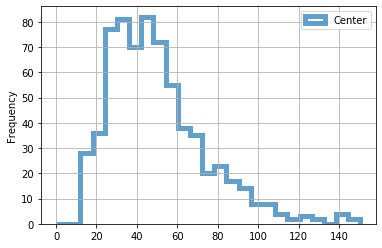

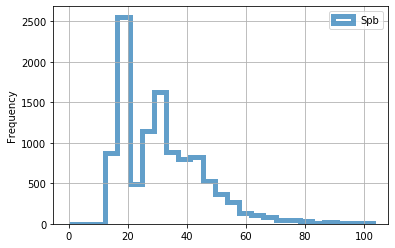


В центре медианное значение last_price : 8000000.0 , среднее значение - 9304641.57080292
В остальной части города медианное значение last_price : 4900000.0 , среднее значение - 5836598.9094807925
0.6125



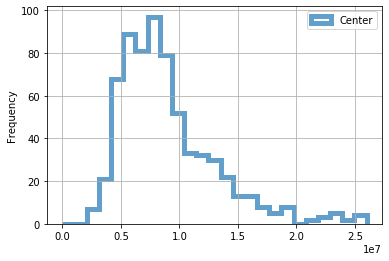

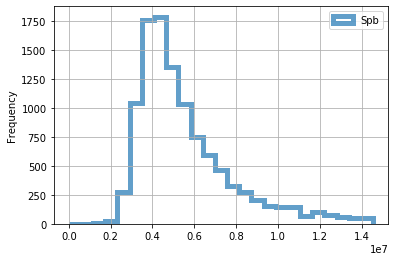


В центре медианное значение square_m_cost : 183132.53012048194 , среднее значение - 192440.77194911914
В остальной части города медианное значение square_m_cost : 181780.4120077917 , среднее значение - 189228.10016595857
0.9926167234635993



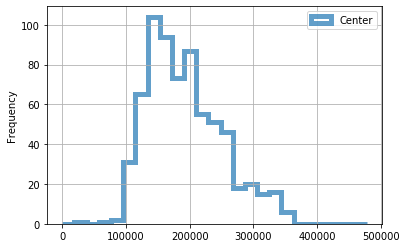

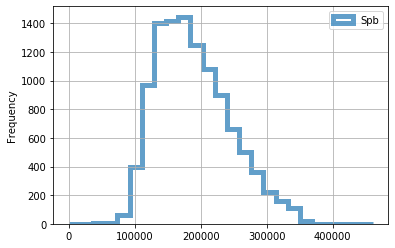


В центре медианное значение rooms : 3.0 , среднее значение - 2.8306569343065693
В остальной части города медианное значение rooms : 2.0 , среднее значение - 1.9825714025002281
0.6666666666666666



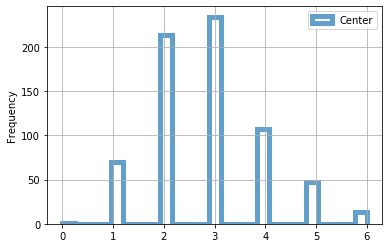

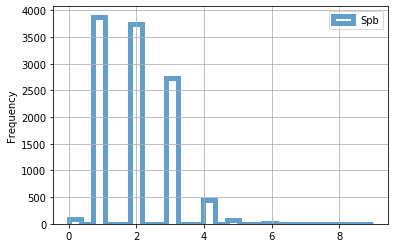


В центре медианное значение ceiling_height : 2.85 , среднее значение - 2.8222773722627736
В остальной части города медианное значение ceiling_height : 2.65 , среднее значение - 2.658786385619126
0.9298245614035087



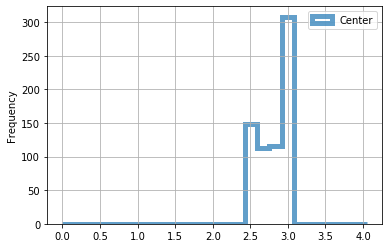

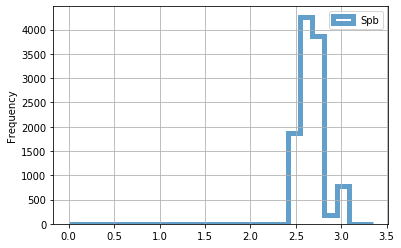


В центре медианное значение floors_total : 5.0 , среднее значение - 5.945985401459854
В остальной части города медианное значение floors_total : 10.0 , среднее значение - 12.312163518569212
2.0



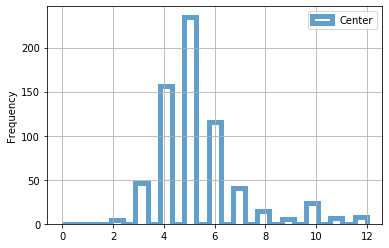

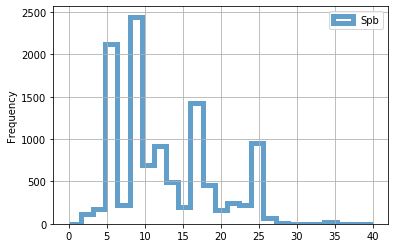

In [33]:
data_spb_center = data_spb.query('city_center_km < 5')
data_spb_wthout_center = data_spb.query('city_center_km >= 5')
list_column = ['living_area', 'last_price', 'square_m_cost', 'rooms', 'ceiling_height', 'floors_total']
for column in list_column:
    print('В центре медианное значение', column, ':', data_spb_center[column].median(), ', среднее значение -', data_spb_center[column].mean())
    print('В остальной части города медианное значение', column, ':', data_spb_wthout_center[column].median(), ', среднее значение -', data_spb_wthout_center[column].mean())
    print(data_spb_wthout_center[column].median()/ data_spb_center[column].median())
    print()
    q1 = data_spb_wthout_center[column].quantile(q = 0.25)
    q3 = data_spb_wthout_center[column].quantile(q = 0.75)
    iqr = (q3 - q1) 
    q1c = data_spb_center[column].quantile(q = 0.25)
    q3c = data_spb_center[column].quantile(q = 0.75)
    iqrc = (q3c - q1c)
    data_spb_center.plot(kind='hist', y=column, histtype='step', range = (0, q3c + 3*iqrc), bins=25, linewidth=5, alpha=0.7, label='Center', grid=True)
    plt.show()
    data_spb_wthout_center.plot(kind='hist',  y=column, histtype='step', range = (0, q3 + 3*iqr), bins=25, linewidth=5, alpha=0.7, label='Spb', grid=True)
    plt.show()
    print()



### Вывод
Центральная зона Санкт-Петербурга по данной выборке - это до 5 км от центра. Зона неоднородна - Санкт-Петербург - культурная столица. Много различных достопримечательностей. Плюс - это город каналов. Стоимость может прыгать не только при удалении от центра, но и при приближении к тем или иным культурным объектам. 
Сравнивая показатели по центральному району Санкт-Петербурга и остальной его части можно сделать следующие выводы:
- средняя жилая площадь продаваемых квартир в центре города - 45.7 кв м. В оставшейся части города - 30 кв м.
- медианная стоимость продаваемого жилья в центре 8 000 000. В оставшейся чати города - 4 900 000.
- медианная стоимость в центре за кв м жилой площади - 183 132. В оставшейся части города - 181 780. (стоимость кв м жилья в центре на 1% выше)
- в центре наиболее часто продаются 2х и 3х комнатные квартиры, в остальной части города чаще продают 1х и 2х комнатные квартиры.
- медианная высота потолка в центре города - 2.85 м., во всей остальной части города - 2.65. Что скорее всего связано с тем, что в центре в основном продают квартиры в  5и этажных дома, тогда как в остальной части города чаще встречаются 10и этажные. 

### Шаг 5. Общий вывод
В данных очень много пропусков. Всего существует 449 записей без каких-либо пропусков. 14 граф из 22 содержат пропуски (от 0,2% до 88%)
 Критичными считаю пропуски в графе 'жилая площадь' ('living_area'). Поскольку эти данные важны для текущего исследования - нет точного способа заполнения пропусков, так как жилая площадь может сильно отличаться от общей и существенно влиять на стоимость жилья.  
  Так же вызывает вопросы заполнение графы 'апартаменты' ('is_apartment') - большая часть данных состоит из пропусков. Возможно, будет лучше, если при заполнении графы будет по умолчанию стоять значение 'False', чтобы избежать пропусков.
  Данные об окружающих объектах и ближайщих объектах так же содержат пропуски, но они не критичны для данного исследования. 
  Заменены пропущенные значения:
-  для графы 'апартаменты'('is_appartment') на значение 'не являются апартаментами' ('False'). Тип значений для этой графы изменен на булевый ('bool'). Аппартаменты - не самая распространенная недвижимость. И для данной работы аппартаменты не являются целью исследования.
- для графы 'floors_total' пропущенные значения заменены на значения 'floor' для этих же строк.
-  для графы 'высота потолка' ('ceiling_height') на медианное значение высоты потолков для зданий той же этажности ('floors_total') - поскольку здания строятся по типовым проектам и здания с одинаковым количеством этажей имеют одинаковую высоту потолков.
- в графе 'balcony' пропущенные значения заменены на 0. Если балконы не указаны - значит их нет.
-  для графы cityCenter_nearest - 5519 пропущенных значений, а для графы airports_nearest - 5542 значения. Это важные показатели - можно жить недалеко от центра города, пользоваться всеми привилегиями города и страдать от рева реактивных двигателей и периодических хлопков перехода самолета на сверхзвуковую скорость. Небольшую часть значений удалось восстановить с помощью медианного значения этих показателей для некоторых городов ('locality_name'). Но большая часть пропущенных значений графы cityCenter_nearest была заменена на 0. (поскольку в изначальном датасете нет ни одного 0 с графе 'cityCenter_nearest' это не внесет путаницу в данные). В Санкт-Петербурге (более половины датасета составляют именно объявления по продаже недвижимости в самом СПб) не существует пропущенных значений и нулевых значений. Для мелких городов и деревень будем считать, что расстояние до ближайшего центра незначительно. 

 Для того, чтобы избежать пропусков в графах cityCenter_nearest и airports_nearest можно использовать не ввод адреса в ручную, а указание конкретного дома на карте. Тогда система сможет автоматически посчитать необходимые расстояний. Эти данные были взяты автоматически - либо не корректно работает система выгрузки данных, либо ресурс, с которго данные были получены слишком не полный / подходит только для СПб и ближайщих населенных пунктов, но не распространяется на города Ленинградской области. 
 
- для граф 'living_area' и 'kitchen_area' были введены коэффициенты для восстановления этих площадей при известной общей площади ('total_area'). Данный способ не является абсолютно точным, но гистограмма для подобранных коэффициентов показывает, что распределение значений '%total-kitchen' (отношение площади кухни к общей площади) и '%total-living' (отношение жилой к общей площади) в выборке похоже на нормальное. Значит, использование медианных значений для данных значений не нарушит реальности данных. 
- для графы 'days_exposition' пропущенные значения были удалены. (Не вижу достоверного способа заполнения этих значений, без данных о длительности объявления не ясно, была ли вообще совершена сделка, или ушла в архив,а квартира так и осталась не продана, потому что цена была слишком завышена) 

Так же изменены типы данных для граф:
- 'first_day_exposition' поскольку это дата на тип datetime64
- 'is_apartment' на тип 'bool'
- 'floors_total' на тип int, считаем, что количество этажей в основном целое число. 

Дубликатов в данном датасете не обнаружено.
 
 В датасете есть странные значения для жилой площади - менее 10 м кв. При нормативе жилой площади 11м кв на человека. Возможно при составлении датасета были сохранены данные с другими единицами измерения.
Так же есть слишком маленькие значения общей площади - менее 17,6м. 
Распределение общей стоимости и стоимости за кв м похожи на нормальные.
Два пика в распределении жилой площади подходят как раз для двух самых часто продаваемых квартир - однокомнатных и двухкомнатных. 
Высота потолков колеблется в небольших пределах. За исключением странных выбросов:
- 304 значения с высотой потолка более 3,5м. 
- 14 значений с очень низкими потолками (менее 2,2 м). 
Это либо ошибки в единицах измерения, либо ошибка при внесении данных.

 
 Минимальная граница для значение 'total_area' и 'ceiling_heignt' взяты из СП 54.13330.2011.
 Минимальные значения для 'living_area' посчитаны с помощью медианного отношения жилой к общей площади - параметр 'living%' для однокомнатной квартиры. При таком расчета учитывается и наличие в списке квартир-студий, чья общая площадь ('total_area') меньше положенной по СП (28м - минимальная общая площадь для 1-комнатной квартиры в многоквартирном доме). 

 Количество дней, за которые продаются квартиры очень разное.
 Есть явные выбросы в 45 и 60 дней - это похоже на стандартные величины - сделки, с закрепленным сроком завершения. 
 Очень редки значения 'days_exposition' больше 1000. 
 Слишком быстрыми могут являтся продажи быстрее, чем за 3 дня. Но таких продаж мало - всего 4. Есть вероятность, что они действительно были сделаны за такой короткий срок.

 Чем меньше общая площадь, тем больше колебания в цене. Это может быть связано с большим разнообразием расположения 1-4х комнатных квартир, большое жилое помещение в городе разместить затруднительно. В городах обычно строят многоэтажные дома с типовыми квартирами. (большинство объявлений о продаже из Санкт-Петербурга)
 Чем больше комнат - тем меньше средняя стоимость кв м.
 Чем дальше от цетнра города - тем ниже стоимость кв м. 

 Стоимость квадратного метра на первом и последнем этажах ниже, чем на других этажах. 
 
 Стоимость кадратного метра понижается во вторник, четверг и выходные (суббота и воскресенье). А наибольшая цена - в понедельник и среду. При этом в выходные количество объявлений снижается вдвое. 

 Стоимость кадратного метра наименьшая в июне. А наибольшая цена - в августе и сентябре. При этом есть видимо новогодний скачок стоимости между декабрем и январем - резкое повышение цены. 

 Стоимость кадратного метра вырола за последние 5 лет примерно на 13% 
 
 Наиболее дорогое жилье находится в г. Санкт-Петербург и поселке Парголово (такие высокие цены на жилье в поселке видимо связаны с активным ростом населения в данном поселке за последние 5 лет, а так же постройке нового современного ЖК "Парголово"). 
В Санкт-Петербурге  больше всего объявлений о продаже - 11 644 объявлений/ более половины всего датасета. 
На последнем месте в 10ке самых дорогих мест для покупки жилья в данном датасете -  Выборг. Жилая площадь в Выборге стоит примерно в 2 раза меньше, чем в Санкт-Петербурге.  

Центральная зона Санкт-Петербурга по данной выборке - до 5км от центра. 

Сравнивая показатели по центральному району Санкт-Петербурга и остальной его части можно сделать следующие выводы:
- средняя жилая площадь продаваемых квартир в центре города - 45.7 кв м. В оставшейся части города - 30 кв м.
- медианная стоимость продаваемого жилья в центре 8 000 000. В оставшейся чати города - 4 900 000.
- медианная стоимость в центре за кв м жилой площади - 183 132. В оставшейся части города - 181 780. (стоимость кв м жилья в центре на 1% выше)
- в центре наиболее часто продаются 2х и 3х комнатные квартиры, в остальной части города чаще продают 1х и 2х комнатные квартиры.
- медианная высота потолка в центре города - 2.85 м., во всей остальной части города - 2.65. Что скорее всего связано с тем, что в центре в основном продают квартиры в  5и этажных дома, тогда как в остальной части города чаще встречаются 10и этажные. 